# GARCH Stock Forecasting

## Read Data

In [132]:
#!pip install arch
#!pip install yfinance

In [133]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## DIS Volatility

In [134]:
start = datetime(2008, 1, 1)
end = datetime(2021, 8, 7)

In [135]:
dis = yf.download('DIS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [136]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

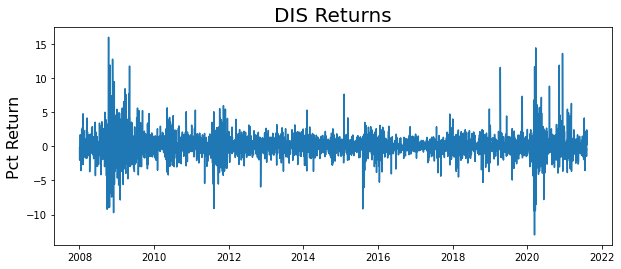

In [137]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

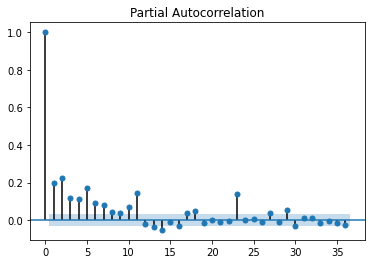

In [138]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [139]:
model = arch_model(returns, p=3, q=3)

In [140]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 6245.547888416824
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6243.919758165489
Iteration:      3,   Func. Count:     36,   Neg. LLF: 6243.3959932521175
Iteration:      4,   Func. Count:     48,   Neg. LLF: 6235.1979065693795
Iteration:      5,   Func. Count:     60,   Neg. LLF: 6234.841839782596
Iteration:      6,   Func. Count:     71,   Neg. LLF: 6233.403602949989
Iteration:      7,   Func. Count:     82,   Neg. LLF: 6232.670935506582
Iteration:      8,   Func. Count:     93,   Neg. LLF: 6231.864755522704
Iteration:      9,   Func. Count:    105,   Neg. LLF: 6231.817526422056
Iteration:     10,   Func. Count:    116,   Neg. LLF: 6231.246045930961
Iteration:     11,   Func. Count:    126,   Neg. LLF: 6228.936769214935
Iteration:     12,   Func. Count:    136,   Neg. LLF: 6227.879664131473
Iteration:     13,   Func. Count:    146,   Neg. LLF: 6227.767770649649
Iteration:     14,   Func. Count:    156,   Neg. LLF: 6227.747

In [141]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6227.72
Distribution:                  Normal   AIC:                           12471.4
Method:            Maximum Likelihood   BIC:                           12520.5
                                        No. Observations:                 3423
Date:                Sun, Aug 08 2021   Df Residuals:                     3422
Time:                        04:51:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0659  2.458e-02      2.682  7.325e-03 [1.774e-02,  0.114]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1553  8.492e-02      1.829  6.743e-02   [-1.114e-02,  0.322]
alpha[1]       0.0431  2.850e-02      1.511      0.131 [-1.279e-02,9.893e-02]
alpha[2]       0.1008  3.520e-02      2.865  4.168e-03    [3.186e-02,  0.170]
alpha[3]       0.0837  8.030e-02      1.042      0.297   [-7.371e-02,  0.241]
beta[1]        0.0000      0.202      0.000      1.000      [ -0.395,  0.395]
beta[2]        0.0000  9.003e-02      0.000      1.000      [ -0.176,  0.176]
beta[3]        0.7246      0.120      6.054  1.410e-09      [  0.490,  0.959]
=============================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [142]:
model = arch_model(returns, p=3, q=0)

In [143]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6536.906639932117
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6524.175116487564
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6512.947925393364
Iteration:      4,   Func. Count:     35,   Neg. LLF: 6462.3819090000525
Iteration:      5,   Func. Count:     43,   Neg. LLF: 6442.503789397763
Iteration:      6,   Func. Count:     51,   Neg. LLF: 6427.880559589404
Iteration:      7,   Func. Count:     60,   Neg. LLF: 6414.825379778356
Iteration:      8,   Func. Count:     68,   Neg. LLF: 6404.186789475094
Iteration:      9,   Func. Count:     76,   Neg. LLF: 6402.217880236819
Iteration:     10,   Func. Count:     84,   Neg. LLF: 6393.587222141759
Iteration:     11,   Func. Count:     91,   Neg. LLF: 6392.254109026315
Iteration:     12,   Func. Count:     98,   Neg. LLF: 6391.959155957339
Iteration:     13,   Func. Count:    105,   Neg. LLF: 6391.912680977597
Iteration:     14,   Func. Count:    112,   Neg. LLF: 6391.9100

In [144]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6391.91
Distribution:                  Normal   AIC:                           12793.8
Method:            Maximum Likelihood   BIC:                           12824.5
                                        No. Observations:                 3423
Date:                Sun, Aug 08 2021   Df Residuals:                     3422
Time:                        04:51:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0546  2.599e-02      2.101  3.563e-02 [3.669e-03,  0.106]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.2850      0.189      6.812  9.641e-12   [  0.915,  1.655]
alpha[1]       0.1279  3.496e-02      3.657  2.553e-04 [5.933e-02,  0.196]
alpha[2]       0.3500  7.003e-02      4.998  5.800e-07   [  0.213,  0.487]
alpha[3]       0.1769  5.792e-02      3.055  2.251e-03 [6.342e-02,  0.290]
==========================================================================

Covariance estimator: robust
"""

In [145]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [146]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

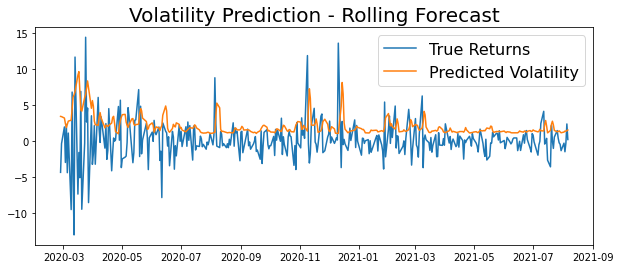

In [147]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [178]:
start = datetime(2008, 1, 1)
end = datetime(2021, 5, 27)

In [179]:
spy =yf.download('^NSEI',start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [180]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

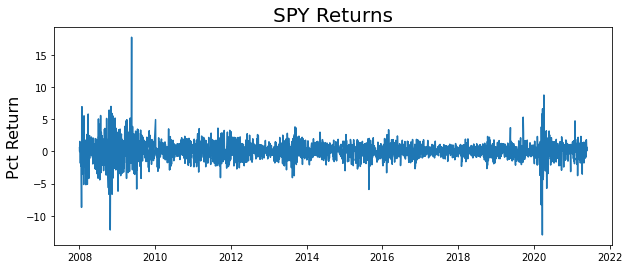

In [181]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

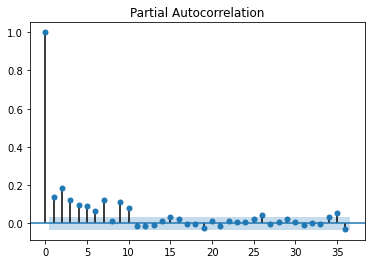

In [182]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [183]:
model = arch_model(returns, p=2, q=2)

In [184]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5013.368181744205
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5008.9578755832645
Iteration:      3,   Func. Count:     33,   Neg. LLF: 5008.938555961724
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5004.514451664386
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5002.568247689063
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5001.494422481988
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4999.607122365258
Iteration:      8,   Func. Count:     78,   Neg. LLF: 4998.883303838831
Iteration:      9,   Func. Count:     87,   Neg. LLF: 4998.475074933985
Iteration:     10,   Func. Count:     97,   Neg. LLF: 4998.262799369528
Iteration:     11,   Func. Count:    105,   Neg. LLF: 4998.205543472622
Iteration:     12,   Func. Count:    115,   Neg. LLF: 4998.188935376813
Iteration:     13,   Func. Count:    124,   Neg. LLF: 4997.977287274443
Iteration:     14,   Func. Count:    132,   Neg. LLF: 4997.7324

In [185]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4997.73
Distribution:                  Normal   AIC:                           10007.5
Method:            Maximum Likelihood   BIC:                           10044.0
                                        No. Observations:                 3270
Date:                Sun, Aug 08 2021   Df Residuals:                     3269
Time:                        05:07:48   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0757  1.762e-02      4.296  1.740e-05 [4.117e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0310  9.721e-03      3.193  1.408e-03 [1.199e-02,5.009e-02]
alpha[1]       0.0663  1.810e-02      3.660  2.524e-04   [3.077e-02,  0.102]
alpha[2]       0.1022  2.123e-02      4.815  1.474e-06   [6.061e-02,  0.144]
beta[1]    5.5346e-17      0.138  3.998e-16      1.000     [ -0.271,  0.271]
beta[2]        0.8166      0.138      5.921  3.207e-09     [  0.546,  1.087]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [186]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [187]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

In [188]:
len(rolling_predictions)

1825

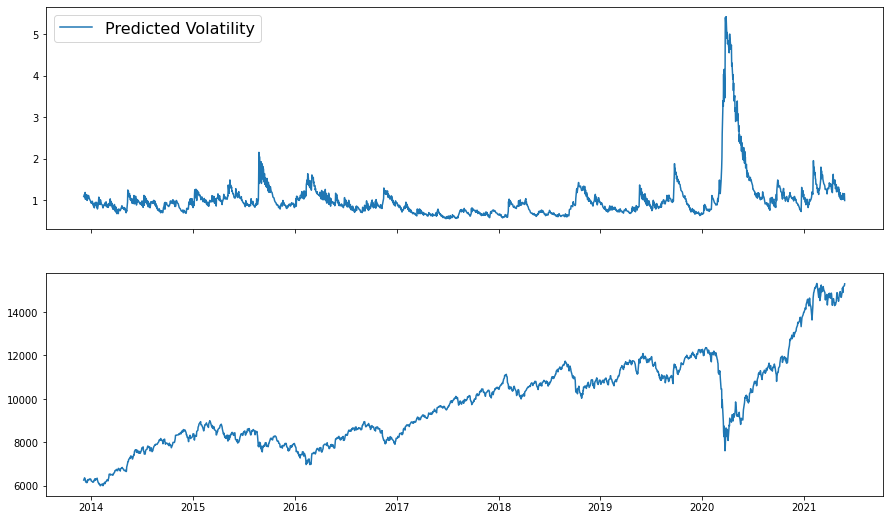

In [189]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)

ax[0].plot(rolling_predictions)
#ax[0].title('Volatility Prediction - Rolling Forecast', fontsize=20)
ax[0].legend(['Predicted Volatility'], fontsize=16)
nifty=spy[-len(rolling_predictions):]
ax[1].plot(nifty['Close'])
plt.show()

# How to use the model

In [194]:
train = returns
model = arch_model(train, p=2, q=0)
model_fit = model.fit(disp='off')

In [195]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

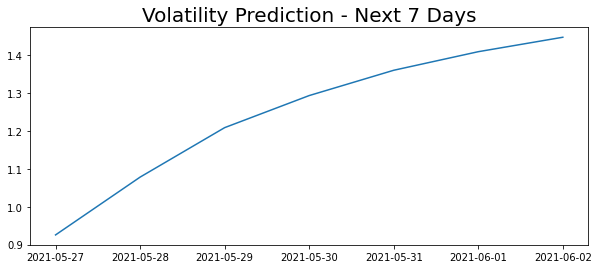

In [196]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

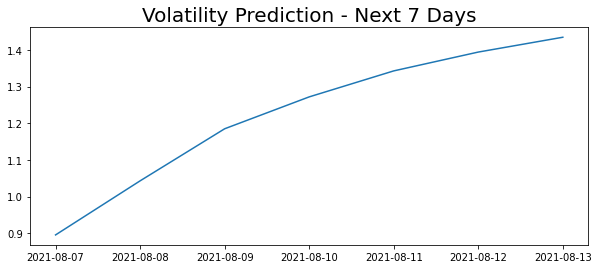

In [197]:
plt.figure(figsize=(10,4))
plt.plot(pred1)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)